In [6]:
import cv2 as cv
import numpy as np

from util import plot_bgr, plot_bw


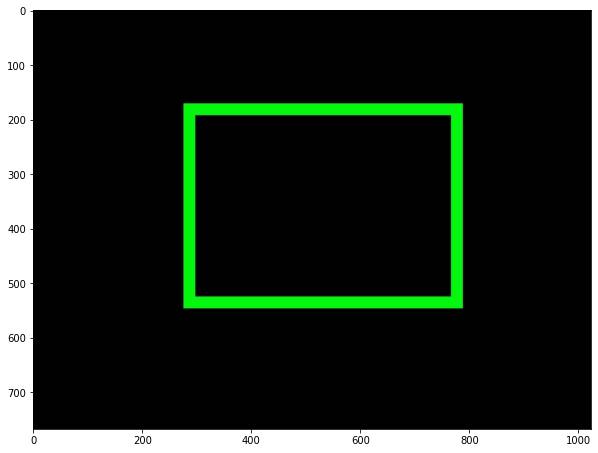

In [7]:
img = cv.imread("rectangle_clean.jpg")
plot_bgr(img)


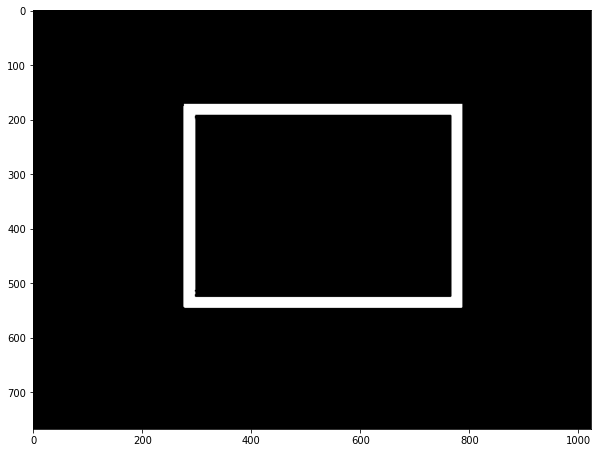

In [8]:
sv_lower = 200
hsv_lower = (40, sv_lower, sv_lower)
hsv_upper = (80, 255, 255)
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
inrange_mask = cv.inRange(hsv_img, hsv_lower, hsv_upper)
plot_bw(inrange_mask)


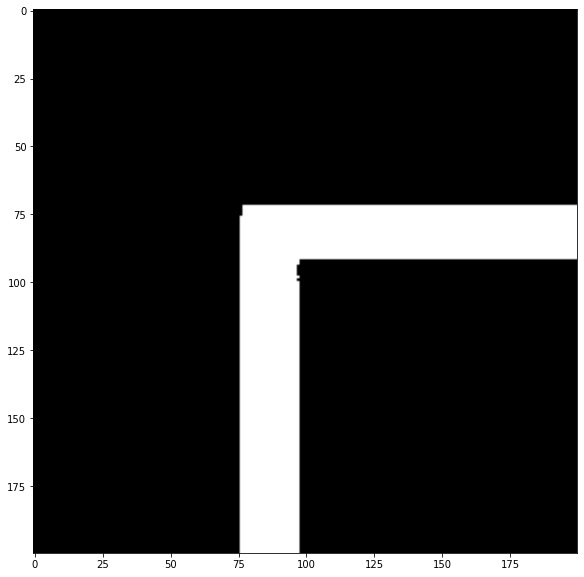

In [9]:
# numpy slice: upper:lower, left:right
plot_bw(inrange_mask[100:300, 200:400])

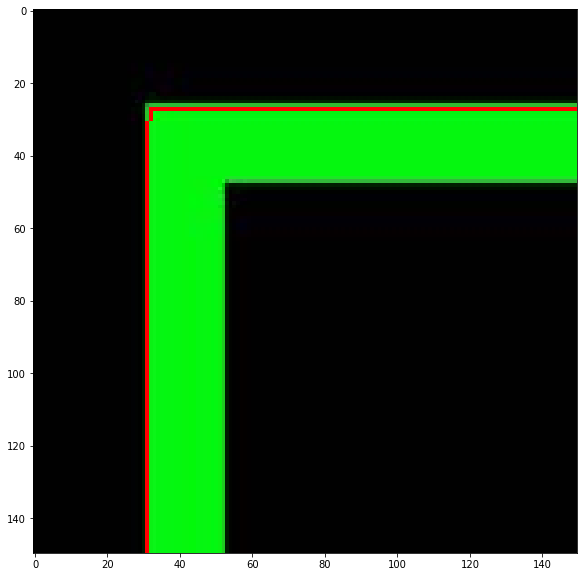

In [10]:
# contours will contain all contours
contours, hierarchy = cv.findContours(inrange_mask.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

# find the largest contour by area
target_contour = max(contours, key = cv.contourArea)

# overlay red contour on copy of original frame and display
img_copy = img.copy()
cv.drawContours(img_copy, [target_contour], 0, (0, 0, 255), 1)
plot_bgr(img_copy[145:295, 245:395])

In [6]:
len(target_contour)

1764

original


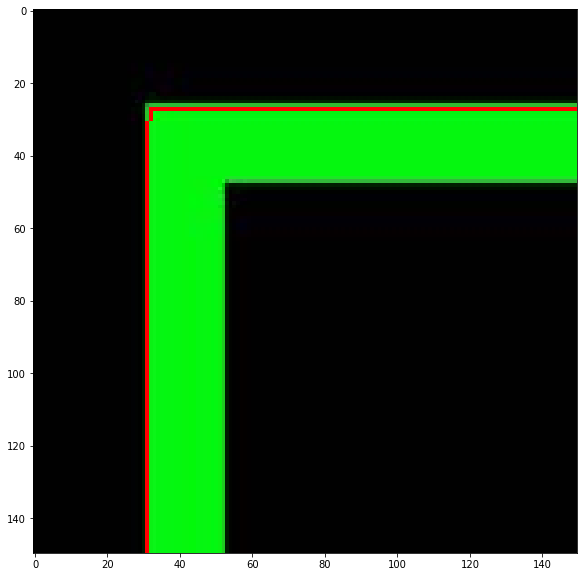

eps = 0.0001, num_points = 8


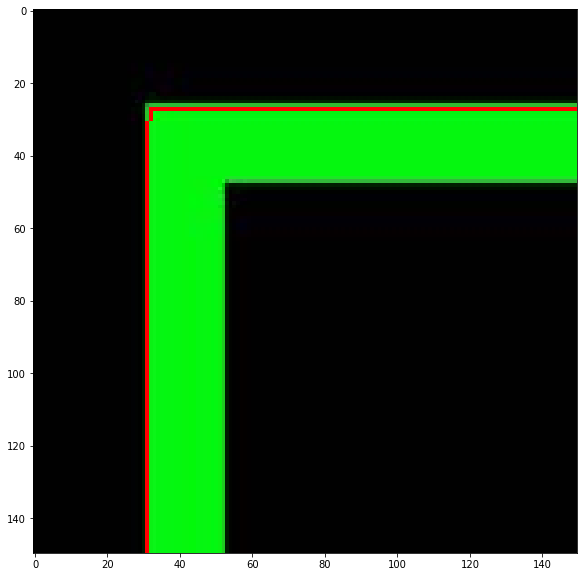

eps = 0.00032, num_points = 8


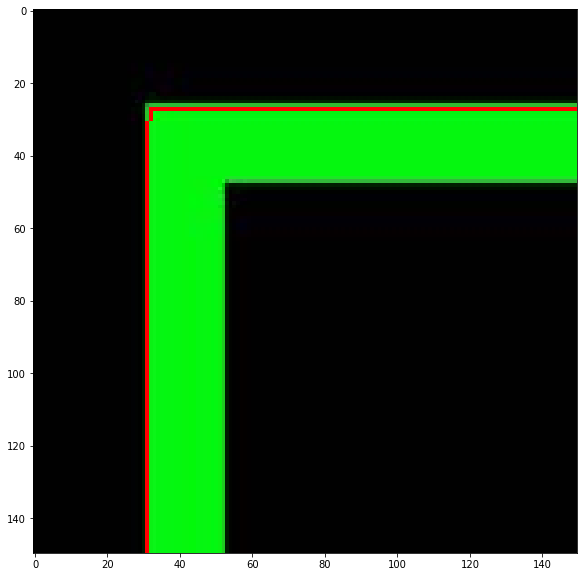

eps = 0.00055, num_points = 7


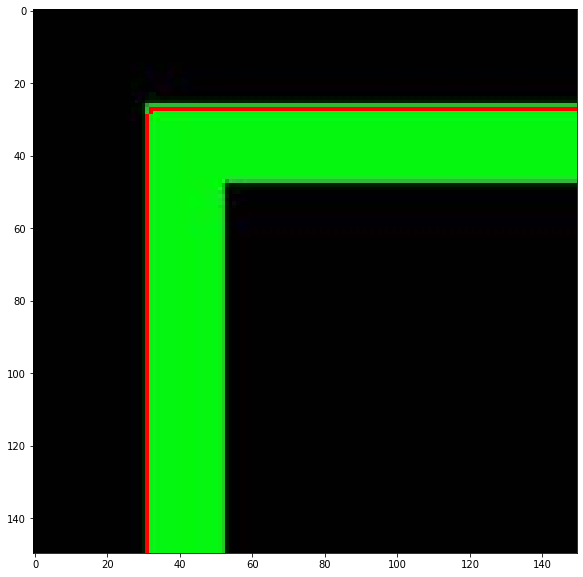

eps = 0.00078, num_points = 5


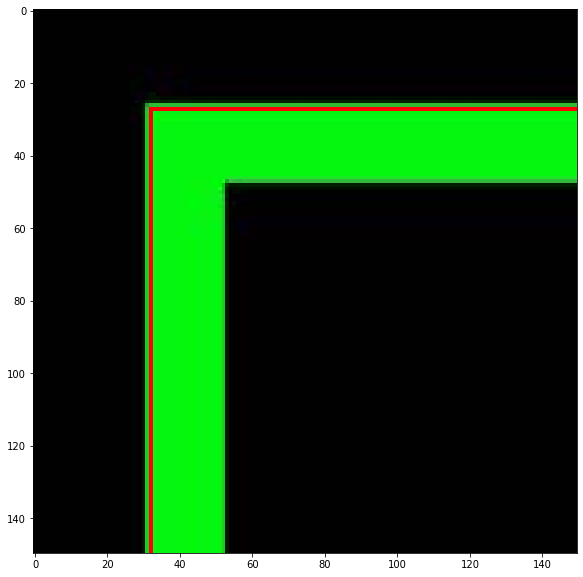

eps = 0.001, num_points = 5


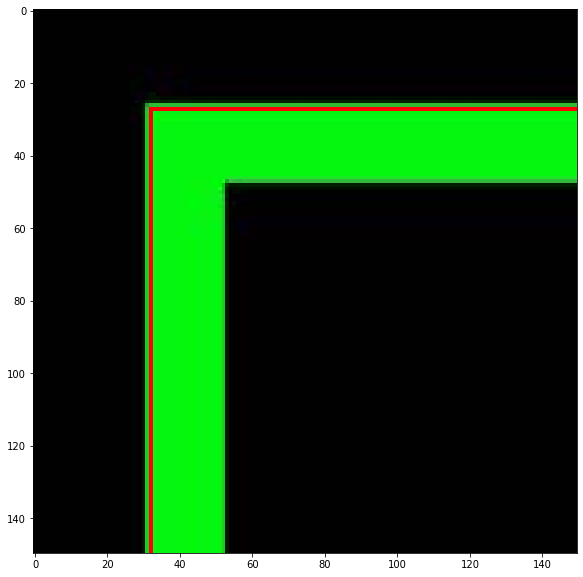

In [9]:
print("original")
plot_bgr(img_copy[145:295, 245:395])
for eps in np.linspace(1e-4, 1e-3, 5):
    peri = cv.arcLength(target_contour, True)
    approx = cv.approxPolyDP(target_contour, eps * peri, True)
    print(f"eps = {eps:2.2}, num_points = {len(approx)}")
    img_c = img.copy()
    cv.drawContours(img_c, [approx], -1, (0, 0, 255), 1)
    plot_bgr(img_c[145:295, 245:395])

In [10]:
np.save("rectangle_clean", target_contour)


In [14]:
target_contour.shape

(1764, 1, 2)